In [ ]:
!pip install supervision
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 53.2 MB/s eta 0:00:00


In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install git+https://github.com/ultralytics/ultralytics.git

  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-xat5gu78
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-xat5gu78
  Resolved https://github.com/ultralytics/ultralytics.git to commit 652e05e833087652053346946827034a4a038025
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 146MB/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5uJ6yAzsc27Y4fgn5PJj")
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to License-Plate-Detector-2 in yolov8:: 100%|██████████| 802/802 [00:00<00:00, 6254.04it/s]


In [ ]:
results = model.train(
    data="/content/License-Plate-Detector-2/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,                 # Smaller batch size for stability
    name="small_dataset_yolo",
    augment=True             # Enable data augmentation
)


Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Detector-2/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=small_dataset_yolo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

100%|██████████| 755k/755k [00:00<00:00, 72.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 153MB/s]


AMP: checks passed ✅


train: Scanning /content/License-Plate-Detector-2/train/labels... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<00:00, 1912.70it/s]

train: New cache created: /content/License-Plate-Detector-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/License-Plate-Detector-2/valid/labels... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<00:00, 909.98it/s]

val: New cache created: /content/License-Plate-Detector-2/valid/labels.cache


Plotting labels to runs/detect/small_dataset_yolo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/small_dataset_yolo
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.22G      1.122      2.775      1.192          9        640: 100%|██████████| 35/35 [00:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all         81         81      0.946      0.216      0.814       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.22G       1.15      1.899      1.158         10        640: 100%|██████████| 35/35 [00:08<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.66it/s]

                   all         81         81      0.771       0.54        0.7      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.22G      1.116      1.875      1.171          6        640: 100%|██████████| 35/35 [00:05<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.02it/s]

                   all         81         81       0.62       0.84       0.81      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.23G      1.042      1.546       1.14          9        640: 100%|██████████| 35/35 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all         81         81      0.731      0.871      0.842       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.22G      1.166      1.552      1.232          9        640: 100%|██████████| 35/35 [00:05<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.00it/s]

                   all         81         81      0.844      0.804      0.895      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.23G      1.132      1.514      1.192          8        640: 100%|██████████| 35/35 [00:06<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all         81         81      0.926      0.728      0.855      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.23G      1.059      1.299      1.124          8        640: 100%|██████████| 35/35 [00:05<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.24it/s]

                   all         81         81      0.931      0.828      0.898      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.23G      1.075      1.201      1.149          9        640: 100%|██████████| 35/35 [00:06<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all         81         81       0.95      0.815      0.943      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.22G     0.9939      1.179      1.127          7        640: 100%|██████████| 35/35 [00:07<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.44it/s]

                   all         81         81      0.909      0.938      0.973      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.23G      1.016      1.067      1.126         15        640: 100%|██████████| 35/35 [00:06<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all         81         81      0.966      0.938      0.977      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.23G     0.9924      1.053      1.136         10        640: 100%|██████████| 35/35 [00:06<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.19it/s]

                   all         81         81      0.926      0.975      0.982      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.23G      1.007          1      1.137          9        640: 100%|██████████| 35/35 [00:05<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]

                   all         81         81       0.95      0.938      0.969      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.21G     0.9689     0.9542      1.084          6        640: 100%|██████████| 35/35 [00:07<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.43it/s]

                   all         81         81       0.95      0.929      0.968      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.22G     0.9537     0.8726      1.093          7        640: 100%|██████████| 35/35 [00:05<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.62it/s]

                   all         81         81      0.907      0.938       0.96      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.22G     0.9757     0.8976      1.106          5        640: 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.74it/s]

                   all         81         81          1      0.934      0.981      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.22G     0.9404     0.8361      1.058          5        640: 100%|██████████| 35/35 [00:05<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.79it/s]

                   all         81         81      0.963      0.974      0.977       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.23G     0.9289     0.8313      1.074         11        640: 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.60it/s]


                   all         81         81      0.975      0.944      0.979      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.23G     0.8893     0.7798      1.077          9        640: 100%|██████████| 35/35 [00:05<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.79it/s]

                   all         81         81      0.962      0.963      0.979      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.22G     0.9129     0.7743      1.048          7        640: 100%|██████████| 35/35 [00:06<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all         81         81          1       0.91      0.953      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.23G     0.8967     0.7376      1.054          7        640: 100%|██████████| 35/35 [00:05<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all         81         81       0.97      0.938      0.973      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.21G     0.8511     0.7297      1.055          6        640: 100%|██████████| 35/35 [00:06<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all         81         81      0.963      0.975      0.983      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.23G     0.8291     0.6993      1.028         10        640: 100%|██████████| 35/35 [00:06<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.01it/s]

                   all         81         81      0.975      0.953      0.983      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.23G     0.8913     0.7615      1.096          9        640: 100%|██████████| 35/35 [00:05<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all         81         81      0.959      0.975      0.983      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.22G     0.7877     0.6631      1.013          5        640: 100%|██████████| 35/35 [00:07<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.59it/s]

                   all         81         81      0.998      0.975      0.985        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.22G     0.8293     0.6877      1.023          9        640: 100%|██████████| 35/35 [00:05<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.08it/s]

                   all         81         81      0.978      0.963      0.984      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.22G     0.8088     0.6242      1.015         11        640: 100%|██████████| 35/35 [00:08<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.44it/s]

                   all         81         81      0.967      0.963      0.984      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.22G     0.7896     0.7018      1.013          6        640: 100%|██████████| 35/35 [00:05<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.40it/s]

                   all         81         81      0.994      0.975      0.984      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.23G     0.8215     0.6643      1.041          9        640: 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  7.33it/s]

                   all         81         81      0.964       0.98      0.983      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.21G     0.8058     0.6301      1.011          6        640: 100%|██████████| 35/35 [00:05<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.58it/s]

                   all         81         81      0.987      0.975      0.984      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.22G     0.8414     0.6823      1.035          8        640: 100%|██████████| 35/35 [00:06<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all         81         81      0.961      0.988      0.983       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.23G     0.7096      0.587      0.983         10        640: 100%|██████████| 35/35 [00:05<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.84it/s]

                   all         81         81      0.986      0.975      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.22G     0.7752     0.5925      1.024          8        640: 100%|██████████| 35/35 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.82it/s]

                   all         81         81      0.974      0.988      0.984      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.23G     0.7696     0.5866      1.004         10        640: 100%|██████████| 35/35 [00:06<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.86it/s]

                   all         81         81      0.974      0.975      0.983      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.23G      0.767     0.5861     0.9769         10        640: 100%|██████████| 35/35 [00:05<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.59it/s]

                   all         81         81      0.976      0.983      0.984      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.22G     0.7272     0.5727     0.9972          8        640: 100%|██████████| 35/35 [00:07<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.14it/s]

                   all         81         81      0.974      0.988      0.983      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.22G     0.7725     0.5926      1.018          3        640: 100%|██████████| 35/35 [00:05<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all         81         81      0.974      0.988      0.985      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.22G     0.6913     0.5319     0.9674          8        640: 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.50it/s]

                   all         81         81      0.964      0.986      0.985      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.23G     0.7412     0.5732      1.008          7        640: 100%|██████████| 35/35 [00:05<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.13it/s]

                   all         81         81      0.975      0.983      0.985      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.23G     0.6909     0.5469     0.9583          9        640: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  8.95it/s]

                   all         81         81      0.975      0.982      0.984      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.22G     0.6746     0.5257     0.9496          5        640: 100%|██████████| 35/35 [00:05<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00, 10.00it/s]

                   all         81         81      0.974      0.988      0.983      0.829


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.22G      0.643     0.4999     0.9239          5        640: 100%|██████████| 35/35 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.66it/s]

                   all         81         81      0.984      0.988      0.983      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.22G     0.6015     0.4704     0.9163          5        640: 100%|██████████| 35/35 [00:05<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.44it/s]

                   all         81         81      0.975      0.988      0.984      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.22G     0.6096     0.4675     0.9201          5        640: 100%|██████████| 35/35 [00:06<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all         81         81      0.974      0.988      0.984      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.22G     0.6053     0.4661     0.9147          5        640: 100%|██████████| 35/35 [00:05<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.20it/s]

                   all         81         81       0.97      0.988      0.985      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.21G     0.5976     0.4563     0.9074          5        640: 100%|██████████| 35/35 [00:05<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all         81         81      0.973      0.988      0.985      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.22G     0.5523       0.45     0.8993          5        640: 100%|██████████| 35/35 [00:07<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.49it/s]

                   all         81         81      0.975      0.988      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.22G     0.5677      0.422     0.9099          5        640: 100%|██████████| 35/35 [00:05<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.29it/s]


                   all         81         81      0.996      0.975      0.986      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.22G     0.5578     0.4216     0.9019          5        640: 100%|██████████| 35/35 [00:08<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.94it/s]

                   all         81         81      0.997      0.975      0.986      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.22G     0.5486     0.4149     0.9041          5        640: 100%|██████████| 35/35 [00:05<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  9.67it/s]

                   all         81         81      0.975      0.988      0.986      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.22G     0.5436     0.4098     0.8797          4        640: 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.07it/s]

                   all         81         81      0.975      0.988      0.986      0.854



50 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/small_dataset_yolo/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/small_dataset_yolo/weights/best.pt, 6.3MB

Validating runs/detect/small_dataset_yolo/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]


                   all         81         81      0.962      0.988      0.985      0.856
Speed: 0.2ms preprocess, 14.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/small_dataset_yolo


In [ ]:
# # Get Bounding Box Predictions
from ultralytics import YOLO

path = "/content/License-Plate-Detector-2/valid/images/a508ecb5-bfdd-46ba-8640-bb827b7c089c___Volkswagen-Polo-jpg_jpeg.rf.3c9c98716c7c67ecba7b00705bb8208f.jpg"

yolo_model = YOLO('/content/runs/detect/small_dataset_yolo/weights/best.pt')
bbox_results = yolo_model.predict(path, verbose=False)

In [ ]:
all_box_list = []
all_conf_list = []


for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []
    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)
        if(conf>=0.5):
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

In [ ]:
all_conf_list

[[0.91]]

In [ ]:
# for i in bbox_results:
#   print(i.boxes)

print(all_box_list[0])
print(all_conf_list)


# for i, box in enumerate(boxes):
#   print(i, box)

[[512, 398, 610, 459]]
[[0.91]]


In [ ]:
ori_path = path
print(ori_path)
ori_image = cv2.imread(ori_path)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

/content/License-Plate-Detector-2/valid/images/a508ecb5-bfdd-46ba-8640-bb827b7c089c___Volkswagen-Polo-jpg_jpeg.rf.3c9c98716c7c67ecba7b00705bb8208f.jpg


In [ ]:
from ultralytics.utils.plotting import Annotator


annotator = Annotator(ori_image)
boxes = all_box_list
confs = all_conf_list

In [ ]:
for i in all_box_list[0]:
  print(i)

[512, 398, 610, 459]


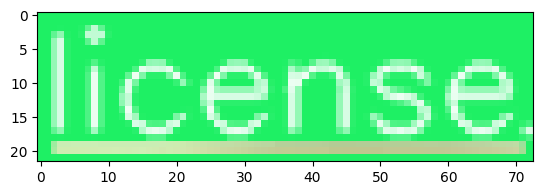

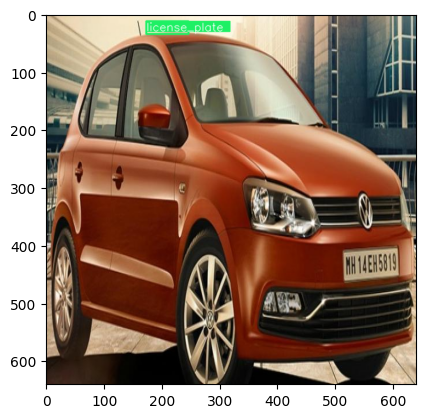

In [ ]:
import matplotlib.pyplot as plt

# for i, box in enumerate(boxes):
#   print(i)
box = [173, 12, 246, 34]
confs = 0.120
annotator.box_label(box=box, label="license_plate ", color=(30, 240, 100))

# Get Plate Object
x1, y1, x2, y2 = box
x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
roi = ori_image[y1:y2, x1:x2]
plt.imshow(roi)
plt.show()

# Show Image
frame = annotator.result()
plt.imshow(frame)
plt.show()

In [ ]:
print(all_box_list)

[[[512, 398, 611, 460]]]


In [ ]:
all_conf_list

[[0.93]]